In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
#from math import log
import numpy as np

In [2]:
air_passengers_df = pd.read_csv('AirPassengers.csv')
air_passengers_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
air_passengers_df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
air_passengers_df['Month'] = pd.to_datetime(air_passengers_df['Month'])
air_passengers_df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
air_passengers_df.rename(columns = {'Month':'datetime'}, inplace = True)

In [8]:
air_passengers_df.head()

,datetime,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
air_passengers_df=air_passengers_df.set_index(['datetime'])
air_passengers_df

,#Passengers
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot: xlabel='datetime'>

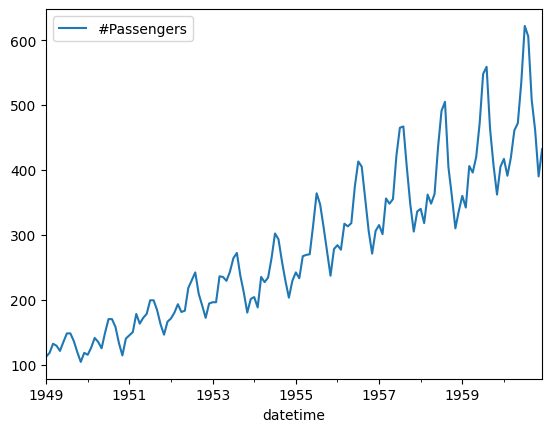

In [16]:
air_passengers_df.plot()
#plt.show()

In [51]:
air_passengers_series = air_passengers_df.squeeze()
air_passengers_series.values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [64]:

#print(air_passengers_series.values)
passenger_values = (air_passengers_series.values)
#passenger_values
result = adfuller(passenger_values)

In [32]:
result[0]

0.8153688792060456

In [33]:
result[1]

0.991880243437641

In [34]:
result

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [60]:
if result[0]>result[4]["5%"]:
    print("not stationary")

not stationary


In [79]:

#print(air_passengers_series.values)
passenger_values2 = np.exp(air_passengers_series.values)
#passenger_values
result2 = adfuller(passenger_values)
print("result0:", result2[0])
print("result4:", result2[4])
if result2[0]>result2[4]['5%']:
    print("not stationary")
else:
    print("Stationary")
    
    

result0: -1.717017089106962
result4: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
not stationary


<AxesSubplot: >

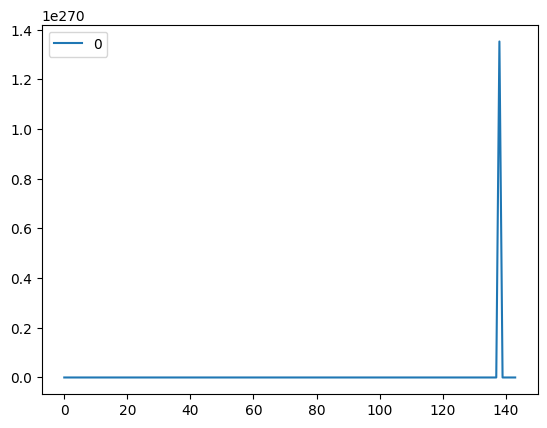

In [81]:
passenger_value2 = pd.DataFrame(passenger_values2)
passenger_value2.plot()

[ 0.27977525  0.6263448  -0.1313086  -0.35781669  0.61895004  0.54657502
  0.         -0.50362127 -0.75319168 -0.71067309  0.66474146 -0.1389752
  0.50116687  0.64936993 -0.25539205 -0.43861015  1.02621573  0.83184919
  0.         -0.46859972 -1.0372425  -0.85548434  1.15508131  0.20943501
  0.20585414  1.09421535 -0.57451873  0.34773171  0.22678702  0.76507192
  0.         -0.54207601 -0.8367379  -0.64487609  0.80105275  0.1925981
  0.33971103  0.47603612 -0.43881994  0.07412521  1.2370738   0.40092783
  0.3905983  -1.09951689 -0.63655733 -0.70539791  0.81351123  0.07161172
  0.          1.3622915  -0.03258178 -0.19696377  0.45571132  0.65961954
  0.24434569 -1.09761818 -0.86896527 -1.10943118  0.76103901  0.10540998
 -0.57154766  1.61840052 -0.26319054  0.23053937  0.95101827  1.13007039
 -0.26090443 -1.02376583 -0.96073099 -0.8849391   0.8849391   0.42360324
 -0.29201166  1.07579712  0.06108483  0.03045726  1.31656262  1.33054468
 -0.45084802 -0.96441428 -1.11057638 -1.15814104  1.2

<AxesSubplot: >

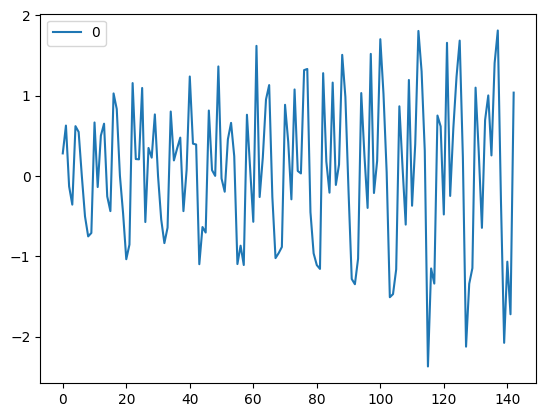

In [78]:

#print(air_passengers_series.values)
passenger_values3 = np.sqrt(air_passengers_series.values)
#passenger_values
passenger_value3 = np.diff(passenger_values3)
print(passenger_value3)
result3 = adfuller(passenger_values)
print("result0:", result3[0])
print("result4:", result3[4])
if result3[0]>result3[4]['5%']:
    print("not stationary")
else:
    print("Stationary")
passenger_value3 = pd.DataFrame(passenger_value3)
passenger_value3.plot()

In [100]:

#print(air_passengers_series.values)
passenger_values3 = np.sqrt(air_passengers_series.values)
#passenger_values
passenger_value3 = np.log(passenger_values3)
df5 = pd.DataFrame(passenger_value3)
df5 = np.log(df5).diff(1)
print(passenger_value3)
result3 = adfuller(df5)
print("result0:", result3[0])
print("result4:", result3[4])
if result3[0]>result3[4]['5%']:
    print("not stationary")
else:
    print("Stationary")
passenger_value3 = pd.DataFrame(passenger_value3)
passenger_value3.plot()

[2.35924944 2.38534231 2.44140096 2.4299062  2.39789527 2.45263739
 2.49860614 2.49860614 2.45632744 2.38956175 2.32219545 2.38534231
 2.37246606 2.41814095 2.47437995 2.45263739 2.41415687 2.50197315
 2.56789922 2.56789922 2.53129752 2.44517456 2.36809922 2.47082121
 2.48836687 2.50531765 2.59089178 2.5468751  2.57374724 2.59089178
 2.64665241 2.64665241 2.60746788 2.54379817 2.49180331 2.55599389
 2.57083178 2.59647843 2.63134509 2.59924852 2.60474308 2.69224753
 2.71903965 2.74446886 2.67116713 2.62613671 2.57374724 2.63392908
 2.63905733 2.63905733 2.7319159  2.72979276 2.716861   2.74653072
 2.78797455 2.80290103 2.73403007 2.67592907 2.59647843 2.65165245
 2.65906    2.61822098 2.72979276 2.71247501 2.72766056 2.78797455
 2.85521351 2.8400863  2.77841403 2.716861   2.65660299 2.716861
 2.74446886 2.72551923 2.79362433 2.79735569 2.79921098 2.87628632
 2.94857693 2.92466239 2.87150159 2.80656405 2.73403007 2.81381056
 2.82448712 2.81200875 2.87945089 2.8731016  2.88102569 2.962127

MissingDataError: exog contains inf or nans

<AxesSubplot: xlabel='datetime'>

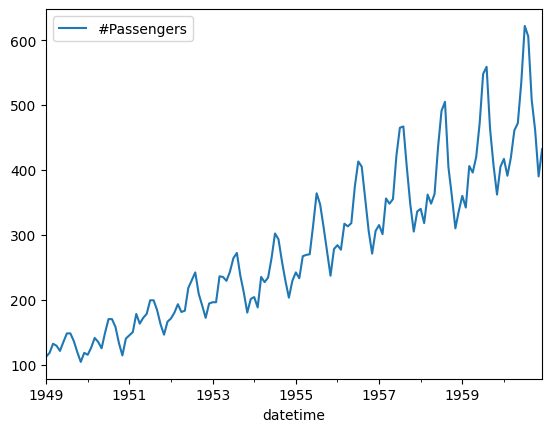

In [82]:
air_passengers_df.plot()

In [85]:
df = air_passengers_df['#Passengers'].values[1:]-(air_passengers_df['#Passengers'].values[:-1])

<AxesSubplot: >

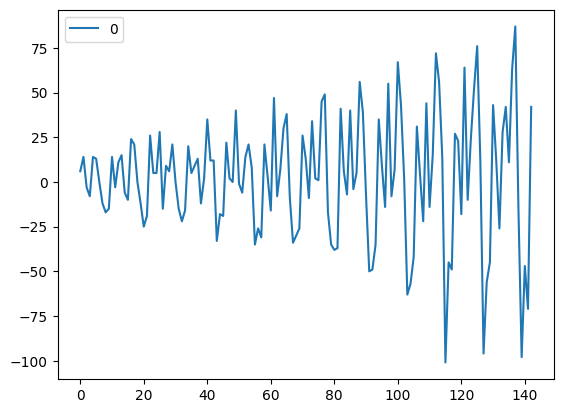

In [87]:
df2 = pd.DataFrame(df)
df2.plot()

<AxesSubplot: xlabel='datetime'>

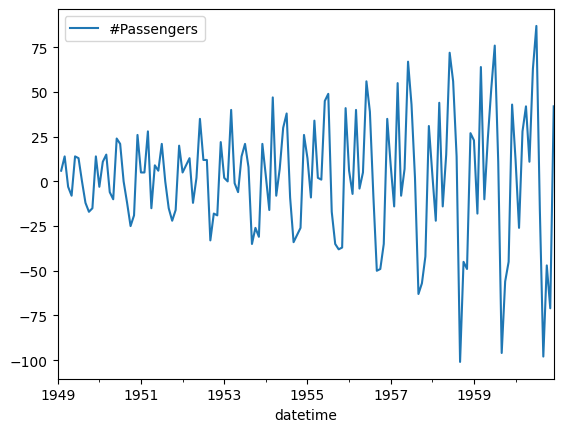

In [91]:
air_passengers_df.diff(1).plot()

In [94]:
adfuller(air_passengers_df.diff(1).dropna())

(-2.8292668241699817,
 0.05421329028382789,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

<AxesSubplot: xlabel='datetime'>

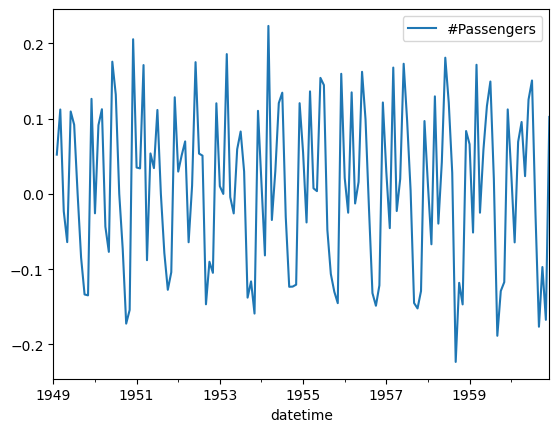

In [97]:
np.log(air_passengers_df).diff(1).plot()

In [98]:
adfuller(np.log(air_passengers_df).diff(1).dropna())

(-2.71713059838813,
 0.07112054815085919,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568094)

In [ ]:
adfuller(np.log(air_passengers_df).diff(1).dropna())